## [作業重點]
使用 Sklearn 中的線性迴歸模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義

## 作業
試著使用 sklearn datasets 的其他資料集 (wine, boston, ...)，來訓練自己的線性迴歸模型。

### HINT: 注意 label 的型態，確定資料集的目標是分類還是回歸，在使用正確的模型訓練！

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split

### 1. 葡萄酒資料集

In [2]:
wine = datasets.load_wine()
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [3]:
print(wine['DESCR'])

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

In [4]:
wine['feature_names']

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
# 確認資料集的目標資料屬性
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

### Logistics regression

In [6]:
# 切割訓練集/測試集
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=5)

In [7]:
from sklearn import linear_model
from sklearn.metrics import accuracy_score

In [8]:
# 建立模型
logreg = linear_model.LogisticRegression()
logreg.fit(X_train, y_train)

C:\Users\freet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\freet\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [9]:
y_pred = logreg.predict(X_test)
y_pred

array([0, 1, 0, 0, 2, 2, 0, 0, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 0, 2, 2])

In [10]:
acc = accuracy_score(y_test, y_pred)
print('Accuracy: ', acc)

Accuracy:  0.9166666666666666


### 2. 波士頓資料集

In [14]:
boston = datasets.load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [12]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [23]:
import pandas as pd
X = pd.DataFrame(boston.data, columns=boston['feature_names'])
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Linear regression

In [29]:
# 選取欲觀察的欄位
X = boston.data[:, np.newaxis, 0]
X

array([[6.32000e-03],
       [2.73100e-02],
       [2.72900e-02],
       [3.23700e-02],
       [6.90500e-02],
       [2.98500e-02],
       [8.82900e-02],
       [1.44550e-01],
       [2.11240e-01],
       [1.70040e-01],
       [2.24890e-01],
       [1.17470e-01],
       [9.37800e-02],
       [6.29760e-01],
       [6.37960e-01],
       [6.27390e-01],
       [1.05393e+00],
       [7.84200e-01],
       [8.02710e-01],
       [7.25800e-01],
       [1.25179e+00],
       [8.52040e-01],
       [1.23247e+00],
       [9.88430e-01],
       [7.50260e-01],
       [8.40540e-01],
       [6.71910e-01],
       [9.55770e-01],
       [7.72990e-01],
       [1.00245e+00],
       [1.13081e+00],
       [1.35472e+00],
       [1.38799e+00],
       [1.15172e+00],
       [1.61282e+00],
       [6.41700e-02],
       [9.74400e-02],
       [8.01400e-02],
       [1.75050e-01],
       [2.76300e-02],
       [3.35900e-02],
       [1.27440e-01],
       [1.41500e-01],
       [1.59360e-01],
       [1.22690e-01],
       [1.

In [30]:
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(X, boston.target, test_size= 0.2, random_state=4)

In [31]:
# 建立一個線性回歸模型並訓練
linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
y_pred = linreg.predict(x_test)
y_pred

array([23.81838993, 23.89140974, 23.85123952, 23.74698872, 23.74422883,
       23.8717564 , 23.90436732, 22.02292342, 17.64463741, 23.29652409,
       23.89682537, 23.86032631, 22.76640464, 23.35744554, 23.70372881,
       19.7816702 , 23.85908089, 19.60682534, 11.4750334 , 23.54530874,
       -7.99965201, 22.97743178, 23.86731715, 23.85450278, 23.89654765,
       23.81822937, 23.72098243, 23.52764286, 21.11369715, 23.83576506,
       20.71314046, 23.88914456, 23.55193941, 23.88011851, 20.88887057,
       19.6472082 , 23.8870486 , 23.78065846, 23.86220529, 23.87028967,
       23.90060937, 23.37909069, 19.09874158, 23.90056597, 23.7546652 ,
       23.89105391, 23.90406356, 23.81056591, 21.0221913 , 23.81038365,
       23.8948596 , 22.84709659, 19.74605205, 23.85393865, 23.48645286,
       23.84453941, 23.84554617, 23.86838032, 23.56172485, 23.88556451,
       23.7669328 , 22.24508124, 23.85547047, 23.86174965, 23.6755094 ,
       23.90354283, 21.44960046, 16.06234607, 21.44015349, 22.31

In [33]:
# 看回歸模型的參數值
from sklearn.metrics import mean_squared_error, r2_score
print('Coefficients: ', linreg.coef_)

Coefficients:  [-0.43394437]


In [34]:
# 評估模型績效
print('MSE: ', mean_squared_error(y_test, y_pred))

MSE:  84.85392509560634


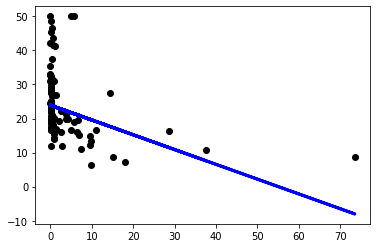

In [35]:
# 畫出回歸模型與實際資料分布
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred, color='blue', linewidth=3)
plt.show()